In [1]:
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 32 # Cada iteración trabajará con un lote de este tamaño
num_epochs = 2 # Itera 2 veces sobre todo el conjunto de entrenamiento
kernel_size = 3 # Kernel de tamaño 3x3
pool_size = 2 # Pooling de tamaño 2x2
conv_depth_1 = 32 # Número de kernels en la primera capa de convolución...
conv_depth_2 = 64 # ...después serán 64
drop_prob_1 = 0.25 # probabilidad de que las neuronas fallen después del primer pooling
drop_prob_2 = 0.5 # probabilidad de fallo en la fully connected
hidden_size = 512 # la capa oculta tiene 512 perceptrones

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # descarga de los conjuntos

4423680/4422102 [==============================] - 3s 1us/step


In [6]:
num_train, height, width = x_train.shape # 60000 ejemplares de entrenamiento según la docu
num_test = x_test.shape[0] # 10000 de prueba
num_classes = np.unique(y_train).shape[0] # 10 clases de prendas

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= np.max(x_train) # Normalización de datos para que estén entre cero y uno
x_test /= np.max(x_test) # Igual

y_train = np_utils.to_categorical(y_train, num_classes) # Generalización para sacar las clases en los datos
y_test = np_utils.to_categorical(y_test, num_classes) # Igual.

In [15]:
inp = Input(shape=(height, width, 1)) # Imágenes en B&N entonces profundidad 1
# En todas las capas convolutivas utilicé relu por ser lo más apropiado, según lo visto en clase.
# Dos capas convolutivas con 32 kernels un pooling y el primer dropout
conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Otras dos capas convolutivas, ahora de 64 kernels y el segundo dropout
conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Para pasarla a la fully connected se aplana. Y luego otro dropout.
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
# softmax para que la suma de la proba de todas las clases sea uno.
out = Dense(num_classes, activation='softmax')(drop_3)

model = Model(inputs=inp, outputs=out) # Definición del modelo

model.compile(loss='categorical_crossentropy', # Porque internet lo dijo
              optimizer='adam', # idem
              metrics=['accuracy']) # Precisión es la métrica, menos mal que no fue el tiempo transcurrido.

model.fit(x_train[..., np.newaxis], y_train,                # Ora sí
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # La buena práctica de validar con el 10%
model.evaluate(x_test[..., np.newaxis], y_test, verbose=1)  # Evaluar de forma automatizada

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
10000/10000 [==============================] - 110s 11ms/step


[0.30410715109109876, 0.88880000000000003]

Y pues sí, los números están ahí. Pero los ejemplos sencillos son más digeribles.

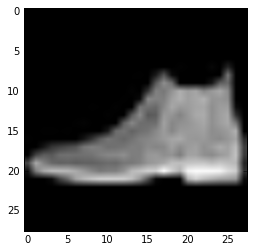

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
try_with = 0 # con diez y con cien no sale xD
plt.imshow(x_test[try_with].reshape((28, 28)), cmap = 'gray') # Uno aleatorio que sí funcione

In [46]:
model.predict(x_test[try_with:try_with+1,:,:,np.newaxis]).argmax() 

9


<table>
<thead>
<tr>
<th>Label</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td>1</td>
<td>Trouser</td>
</tr>
<tr>
<td>2</td>
<td>Pullover</td>
</tr>
<tr>
<td>3</td>
<td>Dress</td>
</tr>
<tr>
<td>4</td>
<td>Coat</td>
</tr>
<tr>
<td>5</td>
<td>Sandal</td>
</tr>
<tr>
<td>6</td>
<td>Shirt</td>
</tr>
<tr>
<td>7</td>
<td>Sneaker</td>
</tr>
<tr>
<td>8</td>
<td>Bag</td>
</tr>
<tr>
<td>9</td>
<td>Ankle boot</td>
</tr>
</tbody>
</table>

<h2>¡Éxito!</h2>